In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

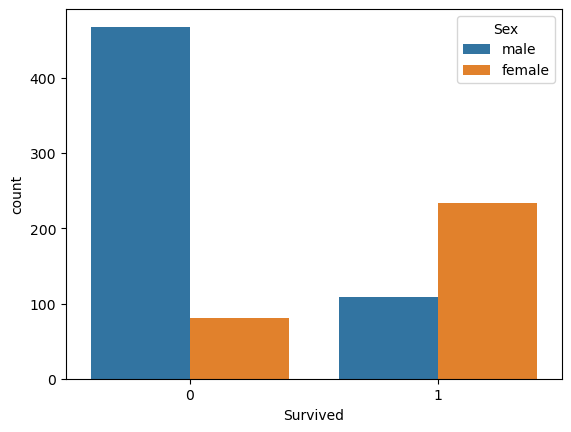

In [8]:
sb.countplot(x='Survived',data=df,hue='Sex')

1. females are mostly survied and males are mostly not survived.

<AxesSubplot: xlabel='Survived', ylabel='count'>

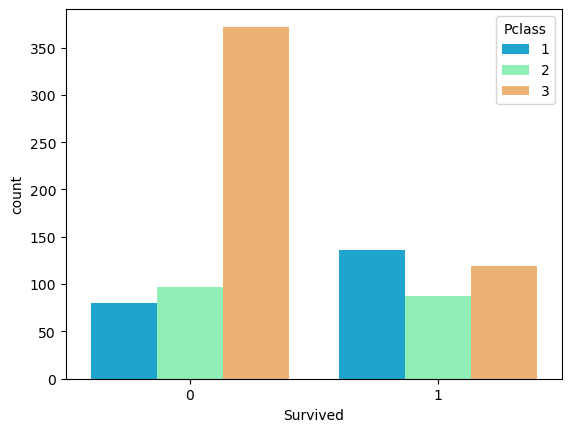

In [9]:
sb.countplot(x='Survived',data=df,hue='Pclass',palette='rainbow')

1. 3rd class peoples are mostly died.

In [10]:
sb.set_style('whitegrid')

C:\Users\hemanth\AppData\Local\Temp\ipykernel_32612\3244137982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'].dropna(),kde=False,color='darkred')


<AxesSubplot: xlabel='Age'>

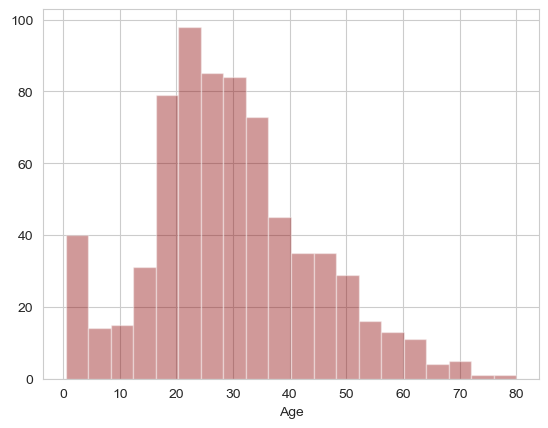

In [11]:
sb.distplot(df['Age'].dropna(),kde=False,color='darkred')

In [12]:
num_fea=[x for x in df.columns if df[x].dtype!='O']

In [13]:
num_fea

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

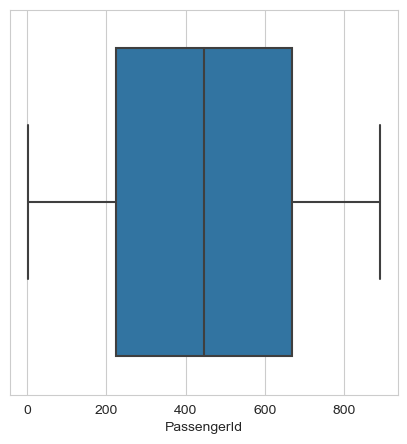

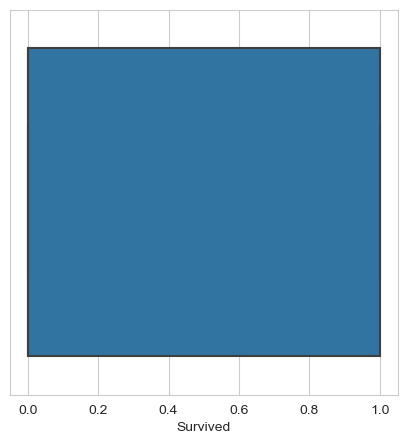

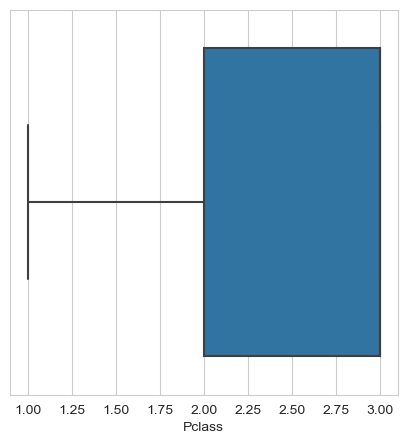

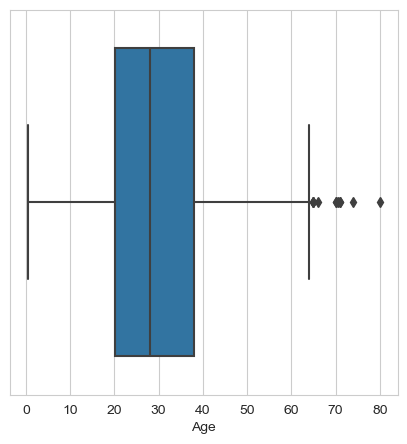

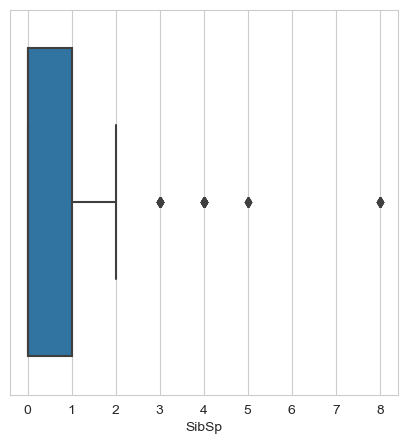

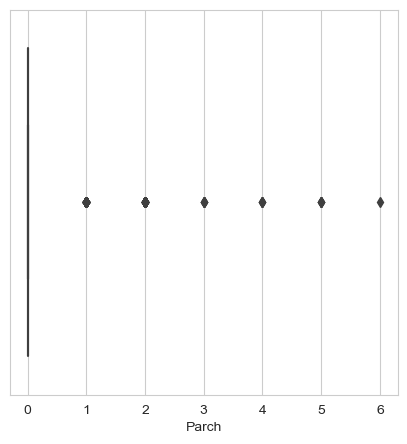

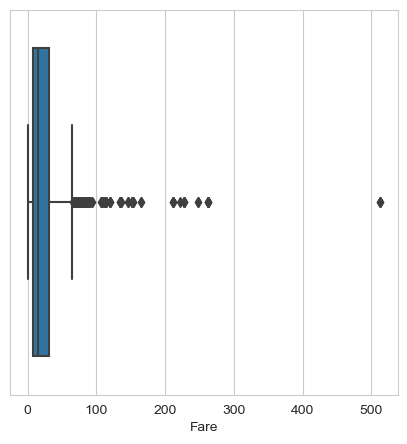

In [14]:
for i in num_fea:
    plt.figure(figsize=(5,5))
    sb.boxplot(data=df,x=i)
    plt.show()

In [15]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5* iqr
upper_limit = q3 + 1.5 * iqr
df_filtered = df[(df['Fare'] > lower_limit) & (df['Fare'] < upper_limit)]

In [16]:
df_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# data cleaning


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

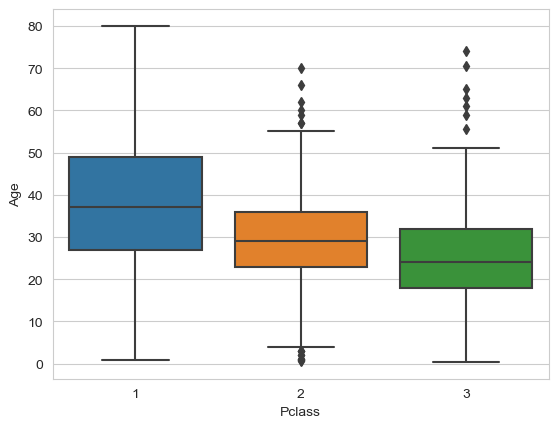

In [17]:
sb.boxplot(x='Pclass',y='Age',data=df)

here we are imputing the age by using another independent variable

In [18]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot: >

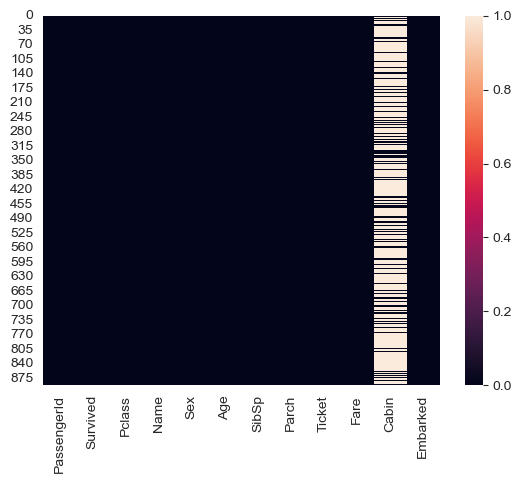

In [20]:
sb.heatmap(df.isnull())

Here we have to drop cabin feature beacuase it has 75% missing values

In [21]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot: >

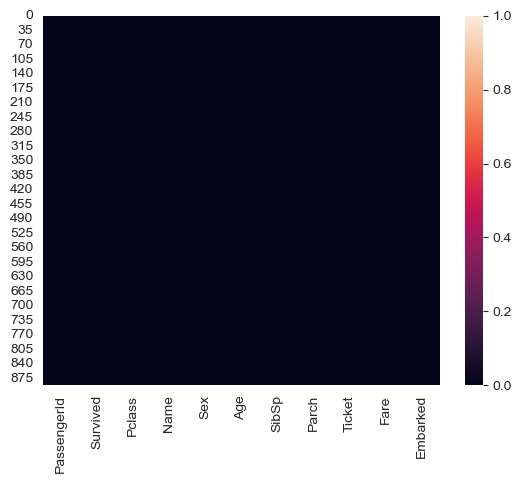

In [22]:
sb.heatmap(df.isnull())

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [27]:
k={ i:l for (l,i) in enumerate(df.Embarked.value_counts().index,0)}

In [28]:
df['Embarked']=df.Embarked.map(k)

In [29]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    uint8  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(5), uint8(1)
memory usage: 63.4 KB


In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [35]:
X=df.drop(['PassengerId','Survived'],axis=1)
y=df['Survived']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [37]:
from sklearn.linear_model import LogisticRegression
Lor=LogisticRegression()

In [38]:
Lor.fit(X_train,y_train)

C:\Users\hemanth\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred=Lor.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [41]:
accuracy

0.8385650224215246

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cf=confusion_matrix(y_pred,y_test)

In [44]:
cf

array([[125,  21],
       [ 15,  62]], dtype=int64)

In [45]:
from sklearn.metrics import recall_score

In [46]:
recall=recall_score(y_pred,y_test)

In [47]:
recall

0.8051948051948052

In [48]:
from sklearn.metrics import precision_score
precision=precision_score(y_pred,y_test)

In [49]:
precision

0.7469879518072289

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=dtc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_pred,y_test)

In [53]:
accuracy1

0.7623318385650224

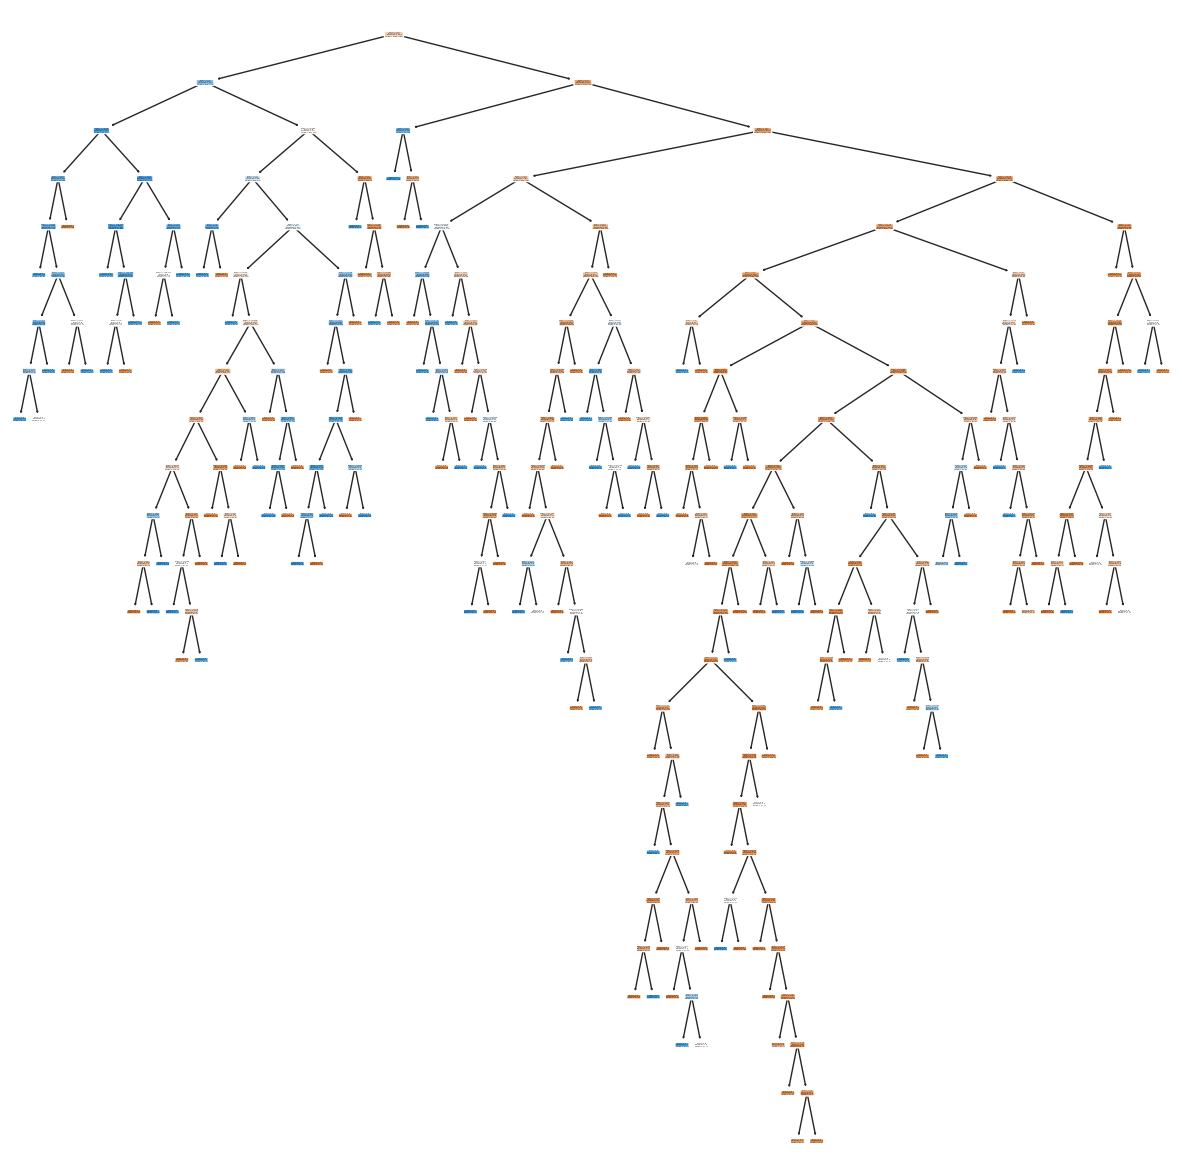

In [54]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dtc,rounded=True,filled=True)
plt.show()

In [55]:
y_train_pred=dtc.predict(X_train)
accuracy2=accuracy_score(y_train_pred,y_train)
print('test_data_prediction : ',accuracy1)
print('train_data_prediction : ',accuracy2)

test_data_prediction :  0.7623318385650224
train_data_prediction :  0.9819819819819819


overfitted

### Post-Pruning

In [56]:
path=dtc.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.00000000e+00 5.36250536e-05 6.95139584e-05 1.66833500e-04
 2.50250250e-04 2.50250250e-04 3.00300300e-04 4.72694917e-04
 5.00500501e-04 5.00500501e-04 5.00500501e-04 5.00500501e-04
 6.25625626e-04 8.55400855e-04 8.58000858e-04 9.03681459e-04
 9.81373530e-04 1.00100100e-03 1.00100100e-03 1.10404522e-03
 1.16058087e-03 1.16743249e-03 1.25125125e-03 1.26280126e-03
 1.34344871e-03 1.35135135e-03 1.39672193e-03 1.40800141e-03
 1.41893120e-03 1.43000143e-03 1.58382333e-03 1.66833500e-03
 1.78750179e-03 1.80180180e-03 1.92248653e-03 1.92500193e-03
 2.00200200e-03 2.00200200e-03 2.06576874e-03 2.10210210e-03
 2.17510744e-03 2.25225225e-03 2.28800229e-03 2.36855904e-03
 2.40332498e-03 2.50250250e-03 2.61130696e-03 2.64550265e-03
 2.70270270e-03 3.32816529e-03 3.59365577e-03 3.63518011e-03
 4.08579198e-03 4.72001678e-03 5.25525526e-03 1.10446014e-02
 1.22218093e-02 2.25869258e-02 3.87625115e-02 1.28637793e-01]
************************************************

In [57]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.1286377928242261


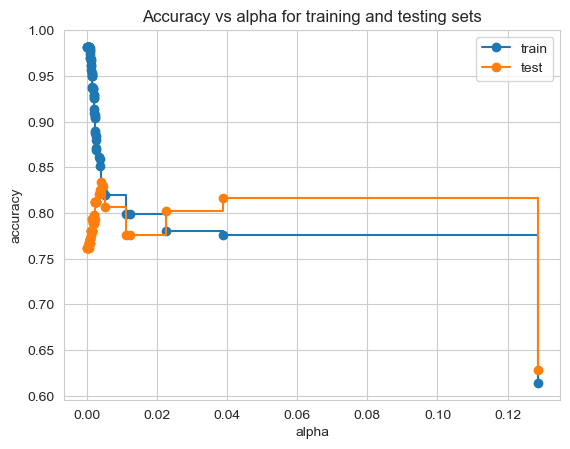

In [58]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

alpha=0.015

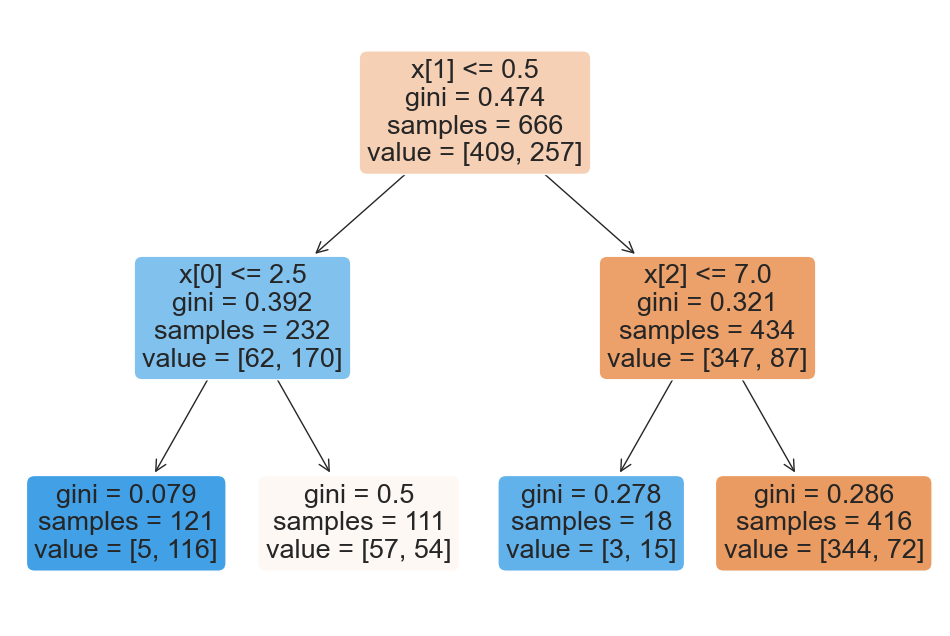

In [59]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [60]:
print(accuracy_score(y_train,clf.predict(X_train)))
print(accuracy_score(y_test,clf.predict(X_test)))

0.7987987987987988
0.7757847533632287


In [61]:
#Ensemble Technique - Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
RFC=RandomForestClassifier(max_depth=3)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [63]:
y_pred1=RFC.predict(X_test)
print(accuracy_score(y_test,RFC.predict(X_test)))

0.8295964125560538


In [64]:
print(accuracy_score(y_train,RFC.predict(X_train)))

0.8288288288288288


In [65]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [66]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [67]:
y_predAD=abc.predict(X_test)
print(accuracy_score(y_test,y_predAD))

0.8251121076233184


In [68]:
print(accuracy_score(y_train,abc.predict(X_train)))

0.8348348348348348


In [85]:
svc=SVC(kernel='linear')

In [86]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [89]:
support_vectors = svc.support_vectors_
coefficients = svc.coef_[0]

# Plot the data points and support vectors
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            facecolors='none', edgecolors='k', linewidths=2)
            
# Plot the decision boundary
x_values = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
y_values = -(coefficients[0] * x_values + svc.intercept_) / coefficients[1]
plt.plot(x_values, y_values, 'r--')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Support Vectors')

# Show the plot
plt.show()

InvalidIndexError: (slice(None, None, None), 0)